In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Wide_WithRanks&Points_V3.csv")

pop = pd.read_csv("population-by-country-gapminder+un.csv")
pop2017 = pd.read_csv("pop2017.csv")
pop2018 = pd.read_csv("pop2018.csv")

In [3]:
pop2017 = pop2017.dropna(axis=0)
pop2018 = pop2018.dropna(axis=0)

idx = data.index[data['Team2'] == 'Guadeloupe'] | data.index[data['Team1'] == 'Great Britain']
data = data.drop(idx,axis=0)

pop2017 = pop2017.reset_index(drop=True)
pop2018 = pop2018.reset_index(drop=True)
data = data.reset_index(drop=True)

In [4]:
data['Date/Time'] = pd.to_datetime(data["Date/Time"], format='%Y-%m-%d %H:%M:%S')

In [5]:
data['Year'] = data['Date/Time'].dt.year

In [6]:
set(data['Team1']).union(set(data['Team2'])) - set(pop['Entity'])

{'England', 'Northern Ireland', 'Scotland', 'Serbia and Montenegro', 'Wales'}

In [7]:
popUK = {2016:{'England':55268100,'Scotland':5404700,'Wales':3113200,'Northern Ireland':1862100,'UK':65648100},
        2001:{'England':42968596,'Scotland':794577,'Wales':609711,'Northern Ireland':215124,'UK':215124+609711+794577+42968596},
        2011:{'England':44246592,'Scotland':708872,'Wales':506619,'Northern Ireland':206735,'UK':44246592+708872+506619+206735},
        2015:{'England':54786327,'Scotland':5373000,'Wales':3099086,'Northern Ireland':1851621,'UK':65110034},
        2004:{'England':50093800,'Scotland':5078400,'Wales':2952500,'Northern Ireland':1710300,'UK':59834900},
        2005:{'England':50431700,'Scotland':5094800,'Wales':2958600,'Northern Ireland':1724400,'UK':60209500},
        2006:{'England':50762900,'Scotland':5116900,'Wales':2965900,'Northern Ireland':1741600,'UK':60587600},
        2007:{'England':51.1e6,'Scotland':5.1e6,'Wales':3e6,'Northern Ireland':1.8e6,'UK':60975000}}

D = {'England':[],'Scotland':[],'Wales':[],'Northern Ireland':[],'UK':[]}

for i in popUK.keys():
    print(i)
    d = popUK[i]
    for j in d.keys():
        D[j].append(d[j]/d['UK']*100)
        
print(D)

2016
2001
2011
2015
2004
2005
2006
2007
{'England': [84.1884228180252, 96.36805483662782, 96.88578320551234, 84.14421500686055, 83.72003629988518, 83.76037004127255, 83.78430569951607, 83.80483804838047], 'Scotland': [8.232835375281235, 1.782041933786322, 1.5522013291432242, 8.252184294666472, 8.487354370108415, 8.461787591659125, 8.445457486350342, 8.364083640836409], 'Wales': [4.742254535927163, 1.3674326962532168, 1.1093324114497556, 4.759767135123905, 4.934411188119308, 4.913842499937717, 4.895226085865755, 4.920049200492005], 'Northern Ireland': [2.8364872707664044, 0.48247053333263956, 0.4526830538946727, 2.843833563349084, 2.858365268430297, 2.8639998671306026, 2.87451557744489, 2.952029520295203], 'UK': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]}


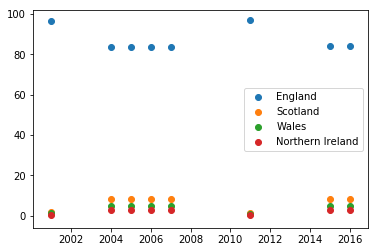

In [8]:
X = [2016,2001,2011,2015,2004,2005,2006,2007]
england = [84.1884228180252, 96.36805483662782, 96.88578320551234, 84.14421500686055, 83.72003629988518, 83.76037004127255, 83.78430569951607, 83.80483804838047]
scotland = [8.232835375281235, 1.782041933786322, 1.5522013291432242, 8.252184294666472, 8.487354370108415, 8.461787591659125, 8.445457486350342, 8.364083640836409]
wales = [4.742254535927163, 1.3674326962532168, 1.1093324114497556, 4.759767135123905, 4.934411188119308, 4.913842499937717, 4.895226085865755, 4.920049200492005]
n_ireland = [2.8364872707664044, 0.48247053333263956, 0.4526830538946727, 2.843833563349084, 2.858365268430297, 2.8639998671306026, 2.87451557744489, 2.952029520295203]

plt.scatter(X,england,label='England')
plt.scatter(X,scotland,label='Scotland')
plt.scatter(X,wales,label='Wales')
plt.scatter(X,n_ireland,label='Northern Ireland')
plt.legend()
plt.show()

England: 84%  
Scotland: 8.3%  
Wales: 4.8%  
Northern Ireland: 2.9%

In [9]:
pop_list = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Christmas Island', 'Cocos Islands', 'Colombia','Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador','Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte',
       'Melanesia', 'Mexico', 'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'North Korea', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan',
       'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland',
       'Polynesia', 'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia', 'Rwanda', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 
       'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea',
       'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

In [10]:
set(pop2018['Country']) - set(pop_list)

{'Brunei Darussalam',
 'Cabo Verde',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Curaçao',
 "Côte d'Ivoire",
 'D.R. Congo',
 "Dem. People's Republic of Korea",
 'Micronesia (Fed. States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Réunion',
 'State of Palestine',
 'Syrian Arab Republic',
 'TFYR Macedonia',
 'Timor-Leste',
 'United States of America',
 'Viet Nam'}

In [11]:
rep = {'Brunei Darussalam':'Brunei', 'Cabo Verde':'Cape Verde', 'China, Hong Kong SAR':'Hong Kong', 'China, Macao SAR':'Macao',
       'Curaçao':'Curacao', "Côte d'Ivoire":"Cote d'Ivoire", 'D.R. Congo':'Democratic Republic of Congo',
       "Dem. People's Republic of Korea":'North Korea', 'Micronesia (Fed. States of)':'Micronesia (country)',
       'Republic of Korea':'South Korea', 'Republic of Moldova':'Moldova', 'Russian Federation':'Russia', 'Réunion':'Reunion',
       'State of Palestine':'Palestine', 'Syrian Arab Republic':'Syria', 'TFYR Macedonia':'Macedonia', 'Timor-Leste':'Timor',
       'United States of America':'United States', 'Viet Nam':'Vietnam'}

In [12]:
for el in rep.keys():
    idx = pop2017.index[pop2017['Country'] == el]
    if len(idx)>0:
        for i in idx:
            pop2017['Country'][i] = rep[pop2017['Country'][i]]
            
for el in rep.keys():
    idx = pop2018.index[pop2018['Country'] == el]
    if len(idx)>0:
        for i in idx:
            pop2018['Country'][i] = rep[pop2018['Country'][i]]

In [13]:
serbia_pop = {1998:7567745, 2000:7516346, 2002:7496522, 2003:7480591, 2004:7463157, 2005:7440769, 2006:7411569, 2008:7350222,
              2009:7320807, 2010:7291436, 2011:7234099, 2012:7199077, 2013:7164132, 2014:7130576, 2015:7095383, 2016:7058322}

except2018 = {'Dominica':74308,'Andorra':76953,'Saint Kitts and Nevis':55850,'Bermuda':61070,'Gibraltar':34733,'Liechtenstein':38155}
except2017 = {'Andorra':76965,'Saint Kitts and Nevis':55345,'Bermuda':61349,'Tuvalu':11192,'Liechtenstein':37922,
              'Dominica':73925,'San Marino':33400,'Turks and Caicos Islands':35446}
except2016 = {'Saint Kitts and Nevis':54821,'Gibraltar':34408,'Liechtenstein':37666,'San Marino':33203,'Andorra':77281,
              'Bermuda':65341}

In [14]:
pop1 = []
pop2 = []

for i in range(len(data)):
    if data['Year'][i] == 2018:
        try:
            if data['Team1'][i] == 'England':
                idx1 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.84)

            elif data['Team1'][i] == 'Scotland':
                idx1 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.083)

            elif data['Team1'][i] == 'Wales':
                idx1 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.048)

            elif data['Team1'][i] == 'Northern Ireland':
                idx1 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.029)
                
            elif data['Team1'][i] == 'Serbia':
                idx1 = pop2018.index[pop2018['Country'] == 'Serbia']
                res = ''
                for x in pop2018.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res))
                
            elif data['Team1'][i] in except2018.keys():
                pop1.append(except2018[data['Team1'][i]])

            else:
                idx1 = pop2018.index[pop2018['Country'] == data['Team1'][i]]
                res = ''
                for x in pop2018.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res))
                
        except:
            print(i,data['Team1'][i],data['Year'][i])
            pop1.append(0)

            
        try:
            if data['Team2'][i] == 'England':
                idx2 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.84)

            elif data['Team2'][i] == 'Scotland':
                idx2 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.083)

            elif data['Team2'][i] == 'Wales':
                idx2 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.048)

            elif data['Team2'][i] == 'Northern Ireland':
                idx2 = pop2018.index[pop2018['Country'] == 'United Kingdom']
                res = ''
                for x in pop2018.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.029)
                
            elif data['Team2'][i] == 'Serbia':
                idx2 = pop2018.index[pop2018['Country'] == 'Serbia']
                res = ''
                for x in pop2018.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res))
                
            elif data['Team2'][i] in except2018.keys():
                pop2.append(except2018[data['Team2'][i]])

            else:
                idx2 = pop2018.index[pop2018['Country'] == data['Team2'][i]]
                res = ''
                for x in pop2018.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res))
                
        except:
            print(i,data['Team2'][i],data['Year'][i])
            pop2.append(0)

        
    elif data['Year'][i] == 2017:
        try:
            if data['Team1'][i] == 'England':
                idx1 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.84)

            elif data['Team1'][i] == 'Scotland':
                idx1 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.083)

            elif data['Team1'][i] == 'Wales':
                idx1 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.048)

            elif data['Team1'][i] == 'Northern Ireland':
                idx1 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res)*0.029)
                
            elif data['Team1'][i] == 'Serbia':
                idx1 = pop2017.index[pop2017['Country'] == 'Serbia']
                res = ''
                for x in pop2017.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res))
                
            elif data['Team1'][i] in except2017.keys():
                pop1.append(except2017[data['Team1'][i]])

            else:
                idx1 = pop2017.index[pop2017['Country'] == data['Team1'][i]]
                res = ''
                for x in pop2017.iloc[idx1[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop1.append(int(res))
        except:
            print(i,data['Team1'][i],data['Year'][i])
            pop1.append(0)
            
        try:
            if data['Team2'][i] == 'England':
                idx2 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.84)

            elif data['Team2'][i] == 'Scotland':
                idx2 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.083)

            elif data['Team2'][i] == 'Wales':
                idx2 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.048)

            elif data['Team2'][i] == 'Northern Ireland':
                idx2 = pop2017.index[pop2017['Country'] == 'United Kingdom']
                res = ''
                for x in pop2017.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res)*0.029)
                
            elif data['Team2'][i] == 'Serbia':
                idx2 = pop2017.index[pop2017['Country'] == 'Serbia']
                res = ''
                for x in pop2017.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res))
            
            elif data['Team2'][i] in except2017.keys():
                pop2.append(except2017[data['Team2'][i]])

            else:    
                idx2 = pop2017.index[pop2018['Country'] == data['Team2'][i]]
                res = ''
                for x in pop2017.iloc[idx2[0]]['Population']:
                    if x.isdigit():
                        res=res+x
                pop2.append(int(res))
        except:
            print(i,data['Team2'][i],data['Year'][i])
            pop2.append(0)
    
    else:
        try:
            if data['Team1'][i] == 'England':
                idx1 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p1 = pop['Total population (Gapminder, UN Population Division)'][idx1[0]] 
                pop1.append(p1*0.84)

            elif data['Team1'][i] == 'Scotland':
                idx1 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p1 = pop['Total population (Gapminder, UN Population Division)'][idx1[0]] 
                pop1.append(p1*0.083)

            elif data['Team1'][i] == 'Wales':
                idx1 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p1 = pop['Total population (Gapminder, UN Population Division)'][idx1[0]] 
                pop1.append(p1*0.048)

            elif data['Team1'][i] == 'Northern Ireland':
                idx1 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p1 = pop['Total population (Gapminder, UN Population Division)'][idx1[0]] 
                pop1.append(p1*0.029)
                
            elif data['Team1'][i] == 'Serbia':
                pop1.append(serbia_pop[data['Year'][i]])
                
            elif data['Team1'][i] == 'Serbia and Montenegro':
                idx1 = list(np.array((pop.loc[pop['Entity'] == 'Montenegro'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p1 = pop['Total population (Gapminder, UN Population Division)'][idx1[0]]
                pop1.append(p1+serbia_pop[data['Year'][i]])
                
            elif data['Year'][i] == 2016 and data['Team1'][i] in except2016.keys():
                pop1.append(except2016[data['Team1'][i]])

            else:
                idx1 = list(np.array((pop.loc[pop['Entity'] == data['Team1'][i]].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p1 = pop['Total population (Gapminder, UN Population Division)'][idx1[0]] 
                pop1.append(p1)
        except:
            print(i,data['Team1'][i],data['Year'][i])
            pop1.append(0)
            
        try:
            if data['Team2'][i] == 'England':
                idx2 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p2 = pop['Total population (Gapminder, UN Population Division)'][idx2[0]] 
                pop2.append(p2*0.84)

            elif data['Team2'][i] == 'Scotland':
                idx2 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p2 = pop['Total population (Gapminder, UN Population Division)'][idx2[0]] 
                pop2.append(p2*0.083)

            elif data['Team2'][i] == 'Wales':
                idx2 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p2 = pop['Total population (Gapminder, UN Population Division)'][idx2[0]] 
                pop2.append(p2*0.048)

            elif data['Team2'][i] == 'Northern Ireland':
                idx2 = list(np.array((pop.loc[pop['Entity'] == 'United Kingdom'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p2 = pop['Total population (Gapminder, UN Population Division)'][idx2[0]] 
                pop2.append(p2*0.029)
                
            elif data['Team2'][i] == 'Serbia':
                pop2.append(serbia_pop[data['Year'][i]])
                
            elif data['Team2'][i] == 'Serbia and Montenegro':
                idx2 = list(np.array((pop.loc[pop['Entity'] == 'Montenegro'].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p2 = pop['Total population (Gapminder, UN Population Division)'][idx2[0]]
                pop2.append(p2+serbia_pop[data['Year'][i]])
                
            elif data['Year'][i] == 2016 and data['Team2'][i] in except2016.keys():
                pop2.append(except2016[data['Team2'][i]])

            else:    
                idx2 = list(np.array((pop.loc[pop['Entity'] == data['Team2'][i]].index) & (pop.loc[pop['Year'] == data['Year'][i]].index)))
                p2 = pop['Total population (Gapminder, UN Population Division)'][idx2[0]] 
                pop2.append(p2)
        except:
            print(i,data['Team2'][i],data['Year'][i])
            pop2.append(0)
            
    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000


In [15]:
data['Population1'] = pop1
data['Population2'] = pop2

In [16]:
data.to_csv("Wide_WithPopulation_V4.csv", index=False, encoding="utf-8")